In [1]:
import pandas as pd
import numpy as np


In [2]:
covid_word = pd.read_csv('../input/covidowid/owid-covid-data.csv')
covid_word

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187796,ZWE,Africa,Zimbabwe,2022-05-15,249206.0,0.0,122.000,5482.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187797,ZWE,Africa,Zimbabwe,2022-05-16,249431.0,225.0,127.857,5484.0,2.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187798,ZWE,Africa,Zimbabwe,2022-05-17,249748.0,317.0,158.000,5484.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187799,ZWE,Africa,Zimbabwe,2022-05-18,250007.0,259.0,195.000,5486.0,2.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Let's study our DataSet. As you can see, it consist of 159321 rows × 67 columns. There is some missing data are observed in the DataSet. We should be sure that Python recognized types of data correctly.


In [3]:
covid_word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187801 entries, 0 to 187800
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    187801 non-null  object 
 1   continent                                   176870 non-null  object 
 2   location                                    187801 non-null  object 
 3   date                                        187801 non-null  object 
 4   total_cases                                 180399 non-null  float64
 5   new_cases                                   180190 non-null  float64
 6   new_cases_smoothed                          179016 non-null  float64
 7   total_deaths                                162023 non-null  float64
 8   new_deaths                                  162021 non-null  float64
 9   new_deaths_smoothed                         160860 non-null  float64
 

As you can see, 66 columns of COVID-19 data were recognized correctly (float64). First 4 columns and tests_units were recognized as objects. Let's investigate them:


In [4]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields]

,iso_code,continent,location,tests_units
0,AFG,Asia,Afghanistan,NaN
1,AFG,Asia,Afghanistan,NaN
2,AFG,Asia,Afghanistan,NaN
3,AFG,Asia,Afghanistan,NaN
4,AFG,Asia,Afghanistan,NaN
...,...,...,...,...
187796,ZWE,Africa,Zimbabwe,tests performed
187797,ZWE,Africa,Zimbabwe,tests performed
187798,ZWE,Africa,Zimbabwe,tests performed
187799,ZWE,Africa,Zimbabwe,tests performed


Let's show information about the field date.


In [5]:
covid_word['date']

0         2020-02-24
1         2020-02-25
2         2020-02-26
3         2020-02-27
4         2020-02-28
             ...    
187796    2022-05-15
187797    2022-05-16
187798    2022-05-17
187799    2022-05-18
187800    2022-05-19
Name: date, Length: 187801, dtype: object

### Сhange the data types of columns


As you can see, the columns: 'iso_code', 'continent', 'location', 'tests_units' have many repetitions and should be assigned to categorical fields **pandas.astype()**. 

The field 'data' should be converted into DataTime type **pandas.to_datetime**  
To see the results we can use **pandas.describe()**.


In [6]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields] =covid_word[fields].astype('category')
covid_word.loc[:, 'date'] = pd.to_datetime(covid_word['date'])
covid_word[fields].describe()

,iso_code,continent,location,tests_units
count,187801,176870,187801,101893
unique,244,6,244,4
top,ARG,Africa,Mexico,tests performed
freq,870,43543,870,75951


### Rows filtering


As we can see, the DataSet contains information about 6 continents and 238 countries.
The field 'tests_units' consist of 4 categories. To show a list of countries, we can use **pandas.Series.cat.categories**.


In [7]:
covid_word['location'].cat.categories

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Wallis and Futuna',
       'Western Sahara', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=244)

Let's investigate the dynamics of new cases of COVID-19 for a separate country. We will use India for saving models and further forecast. You can use your country. Let's use a pandas filter to do this.


In [8]:

c_covid = covid_word[covid_word['location'] == "India"]
c_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
77669,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
77670,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
77671,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
77672,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
77673,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78505,IND,Asia,India,2022-05-15,43123801.0,2202.0,2628.571,524241.0,27.0,21.143,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
78506,IND,Asia,India,2022-05-16,43125370.0,1569.0,2525.857,524260.0,19.0,22.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
78507,IND,Asia,India,2022-05-17,43127199.0,1829.0,2373.286,524293.0,33.0,19.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
78508,IND,Asia,India,2022-05-18,43129563.0,2364.0,2307.143,524303.0,10.0,17.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


### Elimination of missing data


As you can see, there are large fluctuations in the new cases plot. Let's try to make a forecast for these waves.
First of all, we should delete missing data using **pandas.DataFrame.dropna()**


### Data transformation


 To check for dependencies, it is necessary to perform a correlation analysis between them. This requires:

1.  duplicating of data and moving it vertically down for a certain number of days (lag)
2.  deleting the missing data at the beginning and end **pandas.DataFrame.shift()**
3.  calculating the correlation coefficient between the obtained series.

It is convenient to create a separate function for lag:


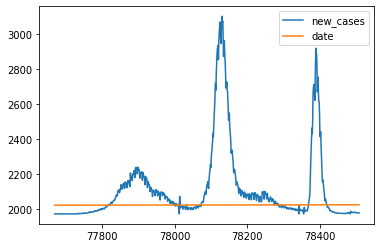

In [9]:
import matplotlib.pyplot as plt
fields = ['new_cases', 'date']
c_covid[fields].plot()
plt.show()

In [10]:
c_covid = c_covid[fields].dropna()
c_covid

,new_cases,date
77669,1.0,2020-01-30
77670,0.0,2020-01-31
77671,0.0,2020-02-01
77672,1.0,2020-02-02
77673,1.0,2020-02-03
...,...,...
78505,2202.0,2022-05-15
78506,1569.0,2022-05-16
78507,1829.0,2022-05-17
78508,2364.0,2022-05-18


Let's create a target DataSet.


In [11]:
y_dataset = c_covid[['new_cases','date']]
y_dataset

,new_cases,date
77669,1.0,2020-01-30
77670,0.0,2020-01-31
77671,0.0,2020-02-01
77672,1.0,2020-02-02
77673,1.0,2020-02-03
...,...,...
78505,2202.0,2022-05-15
78506,1569.0,2022-05-16
78507,1829.0,2022-05-17
78508,2364.0,2022-05-18


# Phophet

In [12]:
from fbprophet import Prophet

In [13]:
fb_confirm = y_dataset.rename(columns={'date': 'ds',
                        'new_cases': 'y'})

fb_confirm.head()

,y,ds
77669,1.0,2020-01-30
77670,0.0,2020-01-31
77671,0.0,2020-02-01
77672,1.0,2020-02-02
77673,1.0,2020-02-03


In [14]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
df=fb_confirm
m = Prophet()
m.fit(df)

Initial log joint probability = -23.7959
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1170.68     0.0119854       94.5216           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       1171.43     0.0150076       193.516   0.0001342       0.001      169  LS failed, Hessian reset 
     170       1172.32   2.22112e-05       84.4078   2.718e-07       0.001      294  LS failed, Hessian reset 
     197       1172.32   3.42031e-08       67.8277       0.606       0.606      331   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [15]:
future = m.make_future_dataframe(periods= 14, freq='D')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-14678.170375,-28672.910661,123359.993634,-14678.170375,-14678.170375,61051.034286,61051.034286,61051.034286,2008.932632,2008.932632,2008.932632,59042.101654,59042.101654,59042.101654,0.0,0.0,0.0,46372.863911
1,2020-01-31,-14419.190372,-37736.994442,122285.137313,-14419.190372,-14419.190372,54527.193504,54527.193504,54527.193504,1993.381979,1993.381979,1993.381979,52533.811526,52533.811526,52533.811526,0.0,0.0,0.0,40108.003133
2,2020-02-01,-14160.210368,-41648.407094,110080.832379,-14160.210368,-14160.210368,47644.283647,47644.283647,47644.283647,1833.927653,1833.927653,1833.927653,45810.355994,45810.355994,45810.355994,0.0,0.0,0.0,33484.073279
3,2020-02-02,-13901.230365,-49283.035097,110163.748723,-13901.230365,-13901.230365,38237.583068,38237.583068,38237.583068,-732.739410,-732.739410,-732.739410,38970.322478,38970.322478,38970.322478,0.0,0.0,0.0,24336.352703
4,2020-02-03,-13642.250362,-64714.234549,83759.898602,-13642.250362,-13642.250362,25374.977475,25374.977475,25374.977475,-6735.295827,-6735.295827,-6735.295827,32110.273302,32110.273302,32110.273302,0.0,0.0,0.0,11732.727113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,2022-05-29,-6287.590512,-66591.294491,96720.915959,-6310.923792,-6273.508960,23346.733033,23346.733033,23346.733033,-732.739410,-732.739410,-732.739410,24079.472443,24079.472443,24079.472443,0.0,0.0,0.0,17059.142522
851,2022-05-30,-6602.520290,-71695.191849,83163.477493,-6635.578330,-6581.870855,14008.571185,14008.571185,14008.571185,-6735.295827,-6735.295827,-6735.295827,20743.867012,20743.867012,20743.867012,0.0,0.0,0.0,7406.050896
852,2022-05-31,-6917.450068,-66730.203551,83427.053375,-6963.788768,-6892.122658,16317.572209,16317.572209,16317.572209,-1241.434552,-1241.434552,-1241.434552,17559.006761,17559.006761,17559.006761,0.0,0.0,0.0,9400.122142
853,2022-06-01,-7232.379846,-75970.310310,88926.847506,-7295.559122,-7199.004974,17400.107523,17400.107523,17400.107523,2873.227525,2873.227525,2873.227525,14526.879998,14526.879998,14526.879998,0.0,0.0,0.0,10167.727677


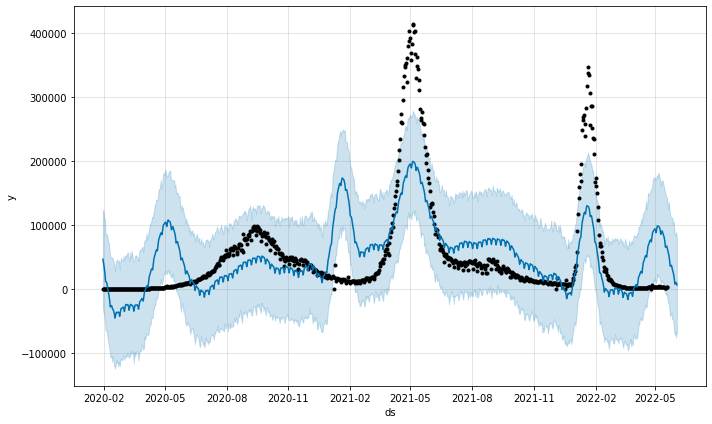

In [16]:
fig1 = m.plot(forecast)

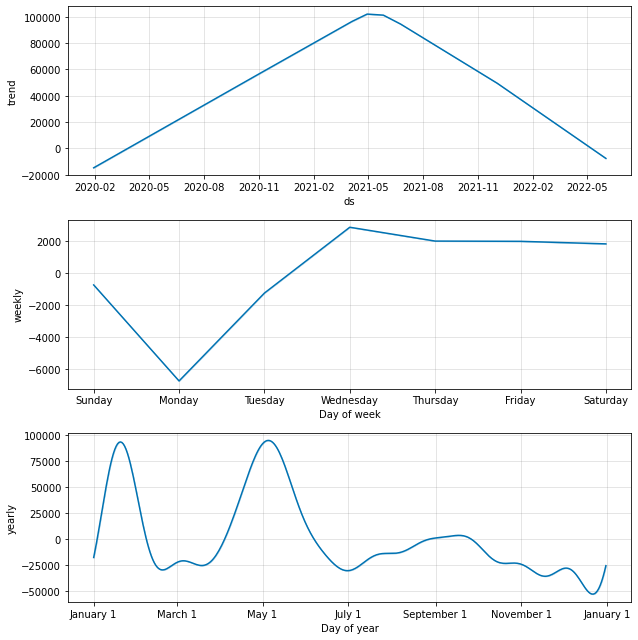

In [17]:
fig2 = m.plot_components(forecast)

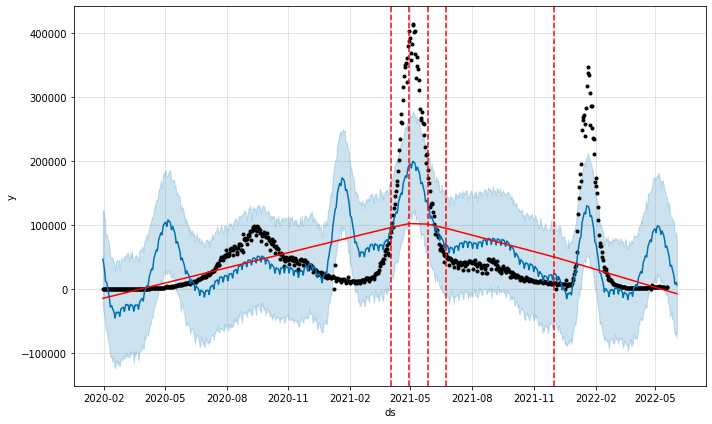

In [18]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)